# Dataset adjustments

In [1]:
import pandas as pd 

In [13]:
#storing the datasets as pandas dataframes

train_data = pd.read_csv('../Data/Processed Dataset Train')
test_data = pd.read_csv('../Data/Processed Dataset Test')

In [14]:
train_data.columns

Index(['id', 'date', 'hour of tweet', 'time of day', 'Early Morning Count',
       'Morning Count', 'Noon Count', 'Eve Count', 'Night Count',
       'Late Night Count', 'user', 'user_followers',
       'Months Since Creation of Account', 'rendered_content',
       'Adjusted Tweet', 'Negative Score', 'Neutral Score', 'Positive Score',
       'Compound Score', 'Photo Count', 'Video Count', 'GIF Count',
       'Polarity Score_textblob', 'Subjectivity Score_textblob', 'likes',
       'retweets', 'replies', 'quoteCount', 'tweet_length', 'num_mentions',
       'num_hashtags', 'num_urls'],
      dtype='object')

In [15]:
#removing unnecessary columns

train_data = train_data.drop('time of day', axis = 1)
train_data = train_data.drop('id', axis = 1)
train_data = train_data.drop('date', axis = 1)
train_data = train_data.drop('user', axis = 1)
train_data = train_data.drop('hour of tweet', axis = 1)
train_data = train_data.drop('Early Morning Count', axis = 1)
train_data = train_data.drop('Morning Count', axis = 1)
train_data = train_data.drop('Noon Count', axis = 1)
train_data = train_data.drop('Eve Count', axis = 1)
train_data = train_data.drop('Night Count', axis = 1)
train_data = train_data.drop('Late Night Count', axis = 1)

test_data = test_data.drop('time of day', axis = 1)
test_data = test_data.drop('id', axis = 1)
test_data = test_data.drop('date', axis = 1)
test_data = test_data.drop('user', axis = 1)
test_data = test_data.drop('hour of tweet', axis = 1)
test_data = test_data.drop('Early Morning Count', axis = 1)
test_data = test_data.drop('Morning Count', axis = 1)
test_data = test_data.drop('Noon Count', axis = 1)
test_data = test_data.drop('Eve Count', axis = 1)
test_data = test_data.drop('Night Count', axis = 1)
test_data = test_data.drop('Late Night Count', axis = 1)

In [17]:
train_data = train_data.drop('rendered_content', axis = 1)

In [18]:
train_data = train_data.drop('Adjusted Tweet', axis = 1)

In [19]:
test_data = test_data.drop('rendered_content', axis = 1)

In [20]:
test_data = test_data.drop('Adjusted Tweet', axis = 1)

In [21]:
train_data

,user_followers,Months Since Creation of Account,Negative Score,Neutral Score,Positive Score,Compound Score,Photo Count,Video Count,GIF Count,Polarity Score_textblob,Subjectivity Score_textblob,likes,retweets,replies,quoteCount,tweet_length,num_mentions,num_hashtags,num_urls
0,795,145,0.077,0.645,0.278,0.8452,2,0,0,0.330000,0.720000,3,1,1,1,274,0,7,1
1,2506,81,0.000,1.000,0.000,0.0000,1,0,0,0.100000,0.400000,0,0,1,0,86,0,1,1
2,2659,167,0.107,0.893,0.000,-0.3400,0,0,0,0.000000,0.100000,14,5,1,0,160,0,1,0
3,394,10,0.081,0.787,0.131,0.2263,0,0,0,0.000000,0.375000,0,1,0,0,283,1,5,0
4,113,113,0.000,1.000,0.000,0.0000,0,1,0,-0.050000,0.300000,1,0,0,0,199,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46284,200,161,0.000,0.784,0.216,0.6705,0,0,0,-0.125000,0.375000,1,0,0,0,138,0,2,0
46285,7078,92,0.000,0.706,0.294,0.7579,1,0,0,0.000000,0.000000,4,2,0,0,179,1,1,1
46286,3554,145,0.184,0.536,0.280,0.4199,1,0,0,0.000000,0.650000,1,0,0,0,296,0,16,1
46287,190,6,0.000,1.000,0.000,0.0000,0,1,0,0.136364,0.454545,2,3,0,0,147,0,6,1


In [22]:
#installing classification and regresion model library 
pip install lightgbm

SyntaxError: invalid syntax (391950818.py, line 2)

In [23]:
from lightgbm import LGBMClassifier, LGBMRegressor

# Hurdle Regression class

In [24]:
from typing import Optional, Union
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

class HurdleRegression(BaseEstimator):
    """ Regression model which handles excessive zeros by fitting a two-part model and combining predictions:
            1) binary classifier
            2) continuous regression
    Implementeted as a valid sklearn estimator, so it can be used in pipelines and GridSearch objects.
    Args:
        clf_name: currently supports either 'logistic' or 'LGBMClassifier'
        reg_name: currently supports either 'linear' or 'LGBMRegressor'
        clf_params: dict of parameters to pass to classifier sub-model when initialized
        reg_params: dict of parameters to pass to regression sub-model when initialized
    """

    def __init__(self,
                 clf_name: str = 'logistic', 
                 reg_name: str = 'linear',
                 clf_params: Optional[dict] = None,
                 reg_params: Optional[dict] = None):

        self.clf_name = clf_name
        self.reg_name = reg_name
        self.clf_params = clf_params
        self.reg_params = reg_params

    @staticmethod
    def _resolve_estimator(func_name: str):
        """ Lookup table for supported estimators.
        This is necessary because sklearn estimator default arguments
        must pass equality test, and instantiated sub-estimators are not equal. """

        funcs = {'linear': LinearRegression(),
                 'logistic': LogisticRegression(solver='liblinear'),
                 'LGBMRegressor': LGBMRegressor(n_estimators=50),
                 'LGBMClassifier': LGBMClassifier(n_estimators=50), 
                 'DTClassifier' : DecisionTreeClassifier(), 
                 'DTRegressor' : DecisionTreeRegressor(), 
                 'RFClassifier' :RandomForestClassifier(), 
                 'RFRegressor' : RandomForestRegressor(),
                 'GBClassifier' : GradientBoostingClassifier(), 
                 'GBRegressor' : GradientBoostingRegressor(), 
                }

        return funcs[func_name]

    def fit(self,
            X: Union[np.ndarray, pd.DataFrame],
            y: Union[np.ndarray, pd.Series]):
        X, y = check_X_y(X, y, dtype=None,
                         accept_sparse=False,
                         accept_large_sparse=False,
                         force_all_finite='allow-nan')

        if X.shape[1] < 2:
            raise ValueError('Cannot fit model when n_features = 1')

        self.clf_ = self._resolve_estimator(self.clf_name)
        if self.clf_params:
            self.clf_.set_params(**self.clf_params)
        self.clf_.fit(X, y > 0)

        self.reg_ = self._resolve_estimator(self.reg_name)
        if self.reg_params:
            self.reg_.set_params(**self.reg_params)
        self.reg_.fit(X[y > 0], y[y > 0])

        self.is_fitted_ = True
        return self

    def predict(self, X: Union[np.ndarray, pd.DataFrame]):
        """ Predict combined response using binary classification outcome """
        X = check_array(X, accept_sparse=False, accept_large_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        return self.clf_.predict(X) * self.reg_.predict(X)

    def predict_expected_value(self, X: Union[np.ndarray, pd.DataFrame]):
        """ Predict combined response using probabilistic classification outcome """
        X = check_array(X, accept_sparse=False, accept_large_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        return self.clf_.predict_proba(X)[:, 1] * self.reg_.predict(X)

'''
def manual_test():
    """ Validate estimator using sklearn's provided utility and ensure it can fit and predict on fake dataset. """
    check_estimator(HurdleRegression())
    from sklearn.datasets import make_regression
    X, y = make_regression()
    reg = HurdleRegression()
    reg.fit(X, y)
    reg.predict(X)


if __name__ == '__main__':
    manual_test()
'''

'\ndef manual_test():\n    """ Validate estimator using sklearn\'s provided utility and ensure it can fit and predict on fake dataset. """\n    check_estimator(HurdleRegression())\n    from sklearn.datasets import make_regression\n    X, y = make_regression()\n    reg = HurdleRegression()\n    reg.fit(X, y)\n    reg.predict(X)\n\n\nif __name__ == \'__main__\':\n    manual_test()\n'

# Classifier: Logistic regression, Regressor: Linear Regression
<b> The following models implement these 3 aspects in the following order
- Model creation
- Cross validation 
- Accuracy for 0s

In [25]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression



# split data into features and target
X_train = train_data.drop(columns=['retweets'])
y_train = train_data['retweets']
X_test = test_data.drop(columns=['retweets'])
y_test = test_data['retweets']

# initialize HurdleRegression model
clf_name = 'logistic'
reg_name = 'linear'

model = HurdleRegression(clf_name=clf_name, reg_name=reg_name)

# fit model on training data
model.fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

# evaluate predictions using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 15.51590202478421


In [26]:
#Getting a list of all the predictions 
preds = model.predict_expected_value(X_test)

In [27]:
print(preds)

[ 1.69279331  0.56453051  5.33165046 ...  0.36061991 11.14539946
  0.99100957]


Cross validation for the first instance of the Hurdle model

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# define the scorer
scorer = make_scorer(mean_squared_error, squared=False)

# cross-validate the model using the scorer
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

# print the average RMSE and its standard deviation
print('Scores:', scores)
print("Average RMSE:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [14.48840906 21.3079124  18.6820352  21.19455107 12.47491894]
Average RMSE: 17.629565333140206
Standard deviation: 3.5716745489006887


Accuracy for zeros

In [29]:
#Looking at the 0-1 accuracy
preds = model.predict_expected_value(X_test)
preds_int = pd.Series(preds.round().astype(int)).to_numpy()
sum(preds_int == y_test.to_numpy())/len(preds_int)

0.31901840490797545

In [30]:
sum(np.multiply((preds_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.3695002135839385

#can use lasso penalty for logistic regresion hyperparameter tuning 


# Classifier: LGBM, Regressor: LGBM

In [31]:
#try boosted tree as a regressor 

# initialize HurdleRegression model
clf_name = 'LGBMClassifier'
reg_name = 'LGBMRegressor'

model_2 = HurdleRegression(clf_name=clf_name, reg_name=reg_name)

# fit model on training data
model_2.fit(X_train, y_train)

# make predictions on test data
y_pred = model_2.predict(X_test)

# evaluate predictions using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 29.23498876100229


In [32]:
#Looking at the 0-1 accuracy
preds_2 = model_2.predict_expected_value(X_test)
preds_2_int = pd.Series(preds_2.round().astype(int)).to_numpy()
sum(preds_2_int == y_test.to_numpy())/len(preds_2_int)

0.5803162533483107

In [33]:
sum(np.multiply((preds_2_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.7899757938203047

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# define the scorer
scorer = make_scorer(mean_squared_error, squared=False)

# cross-validate the model using the scorer
scores_2 = cross_val_score(model_2, X_train, y_train, cv=5, scoring=scorer)

# print the average RMSE and its standard deviation
print('Scores:', scores_2)
print("Average RMSE:", scores_2.mean())
print("Standard deviation:", scores_2.std())


Scores: [12.92028249 14.67160102 14.76553576 19.44619868 11.62924471]
Average RMSE: 14.686572532457102
Standard deviation: 2.650567271940189


In [ ]:
pip install shap

In [35]:
import shap
explainer = shap.TreeExplainer(model_2)
shap_values = explainer.shap_values(X_test)

InvalidModelError: Model type not yet supported by TreeExplainer: <class '__main__.HurdleRegression'>

In [ ]:
#can try boosted tree for classification as well 


In [ ]:
#need to use shap to 
#can make it a multi classification model - predict into retweet number groups 

# Decision trees for classifiers and regressors

In [38]:
# initialize HurdleRegression model
clf_name = 'DTClassifier'
reg_name = 'DTRegressor'

model_3 = HurdleRegression(clf_name=clf_name, reg_name=reg_name)

# fit model on training data
model_3.fit(X_train, y_train)

# make predictions on test data
y_pred = model_3.predict(X_test)

# evaluate predictions using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 30.64412383123061


In [37]:
# cross-validate the model using the scorer
scores_3 = cross_val_score(model_3, X_train, y_train, cv=5, scoring=scorer)

# print the average RMSE and its standard deviation
print('Scores:', scores_3)
print("Average RMSE:", scores_3.mean())
print("Standard deviation:", scores_3.std())


Scores: [17.9042512  17.99314184 17.10074288 19.53847737 10.24684739]
Average RMSE: 16.556692139810195
Standard deviation: 3.252090967704421


In [39]:
#Looking at the 0-1 accuracy
preds_3 = model_3.predict_expected_value(X_test)
preds_3_int = pd.Series(preds_3.round().astype(int)).to_numpy()
sum(preds_3_int == y_test.to_numpy())/len(preds_3_int)

0.5378035081655578

In [40]:
sum(np.multiply((preds_3_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.7898334045279795

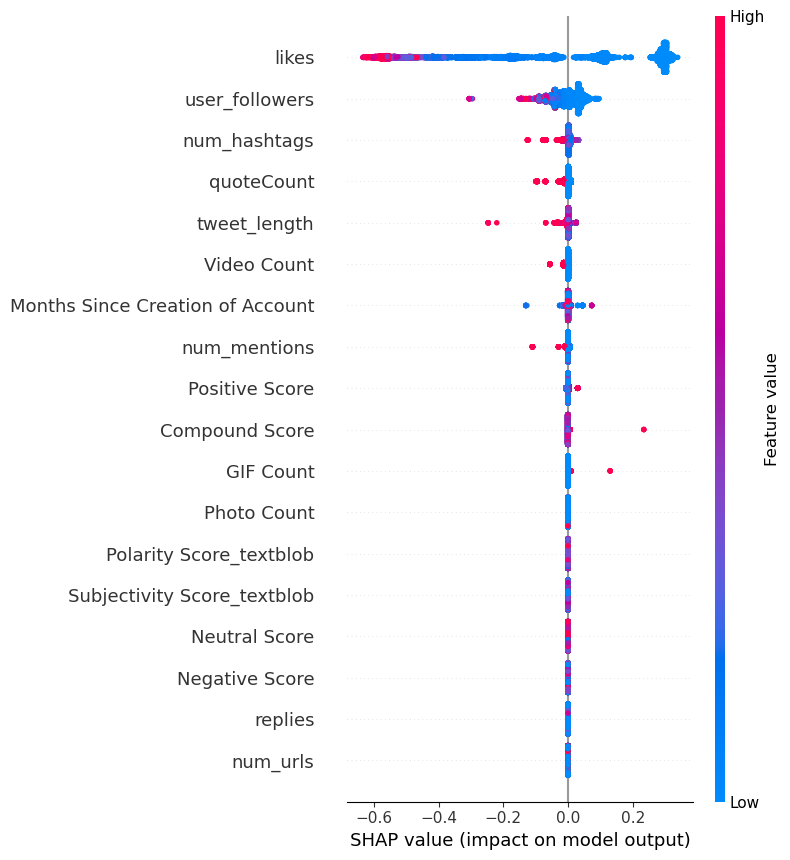

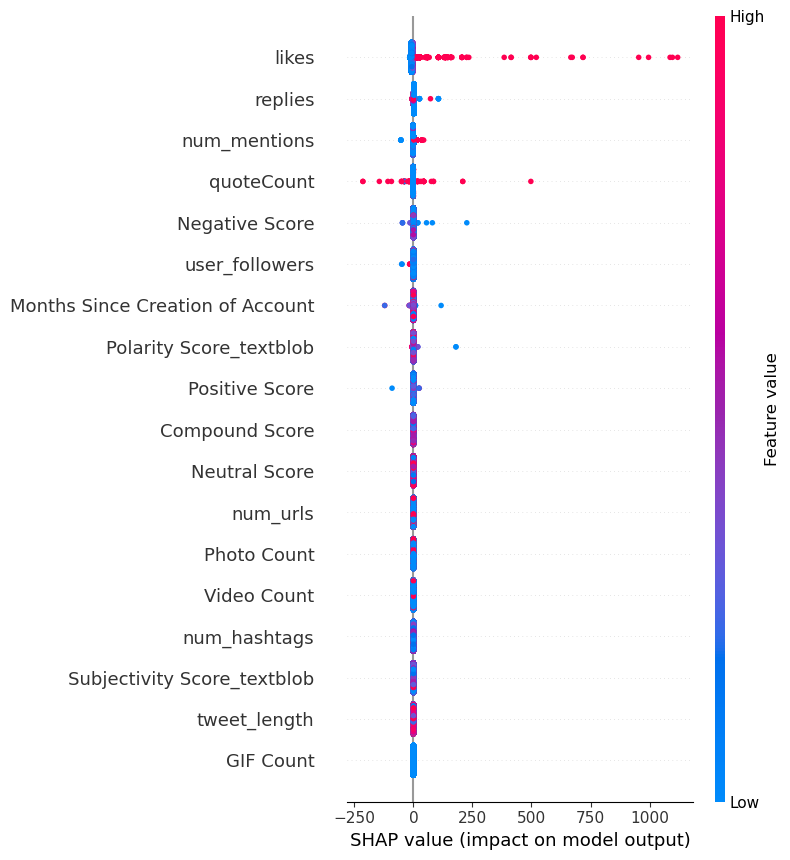

In [54]:
# Separate the data into those with zero values and those without
zero_mask = (y_train == 0)
pos_mask = (y_train > 0)

# Set the target variable to binary values indicating zero or positive values
y_train_zero = zero_mask.astype(int)
y_train_pos = y_train[pos_mask]
X_train_pos = X_train[pos_mask]

# Train the decision tree classifier on the binary zero/positive values
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train_zero)

# Train the decision tree regressor on the positive values
reg = DecisionTreeRegressor(max_depth=5, random_state=42)
reg.fit(X_train_pos, y_train_pos)

# Calculate the SHAP values for the classifier
explainer_clf = shap.TreeExplainer(clf)
shap_values_clf_test = explainer_clf.shap_values(X_test)

# Calculate the SHAP values for the regressor
explainer_reg = shap.TreeExplainer(reg)
shap_values_reg_test = explainer_reg.shap_values(X_test[X_train_pos.columns])

# Plot the summary plot for the classifier
shap.summary_plot(shap_values_clf_test[1], X_test)

# Plot the summary plot for the regressor
shap.summary_plot(shap_values_reg_test, X_test[X_train_pos.columns])

# Random forests for classifiers and regressors

In [41]:
# initialize HurdleRegression model
clf_name = 'RFClassifier'
reg_name = 'RFRegressor'

model_4 = HurdleRegression(clf_name=clf_name, reg_name=reg_name)

# fit model on training data
model_4.fit(X_train, y_train)

# make predictions on test data
y_pred = model_4.predict(X_test)

# evaluate predictions using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 26.419392645193316


In [42]:
# cross-validate the model using the scorer
scores_4 = cross_val_score(model_4, X_train, y_train, cv=5, scoring=scorer)

# print the average RMSE and its standard deviation
print('Scores:', scores_4)
print("Average RMSE:", scores_4.mean())
print("Standard deviation:", scores_4.std())


Scores: [13.36520662 11.61762619 15.64732661 16.30517178 10.12707503]
Average RMSE: 13.41248124556196
Standard deviation: 2.340078026055235


In [43]:
#Looking at the 0-1 accuracy
preds_4 = model_3.predict_expected_value(X_test)
preds_4_int = pd.Series(preds_4.round().astype(int)).to_numpy()
sum(preds_4_int == y_test.to_numpy())/len(preds_4_int)

0.5378035081655578

In [44]:
sum(np.multiply((preds_4_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.7898334045279795

In [51]:
zero_mask = (y_train == 0)
pos_mask = (y_train > 0)

# Set the target variable to binary values indicating zero or positive values
y_train_zero = zero_mask.astype(int)
y_train_pos = y_train[pos_mask]
X_train_pos = X_train[pos_mask]

In [52]:
# Train the random forest classifier on the binary zero/positive values
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train_zero)

# Train the random forest regressor on the positive values
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
reg.fit(X_train_pos, y_train_pos)

RandomForestRegressor(max_depth=5, random_state=42)

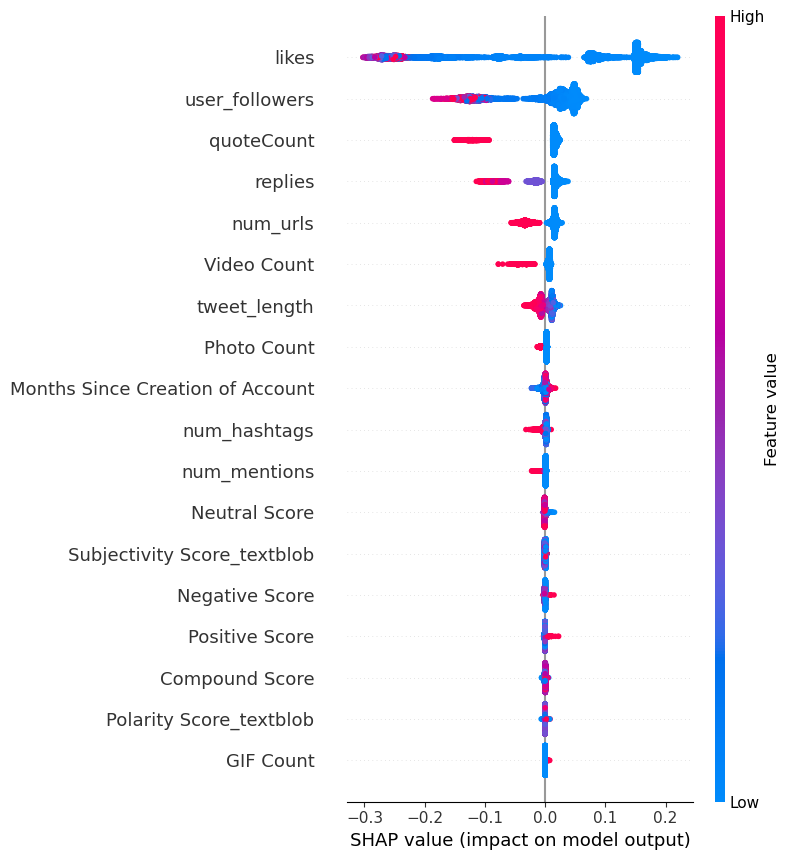

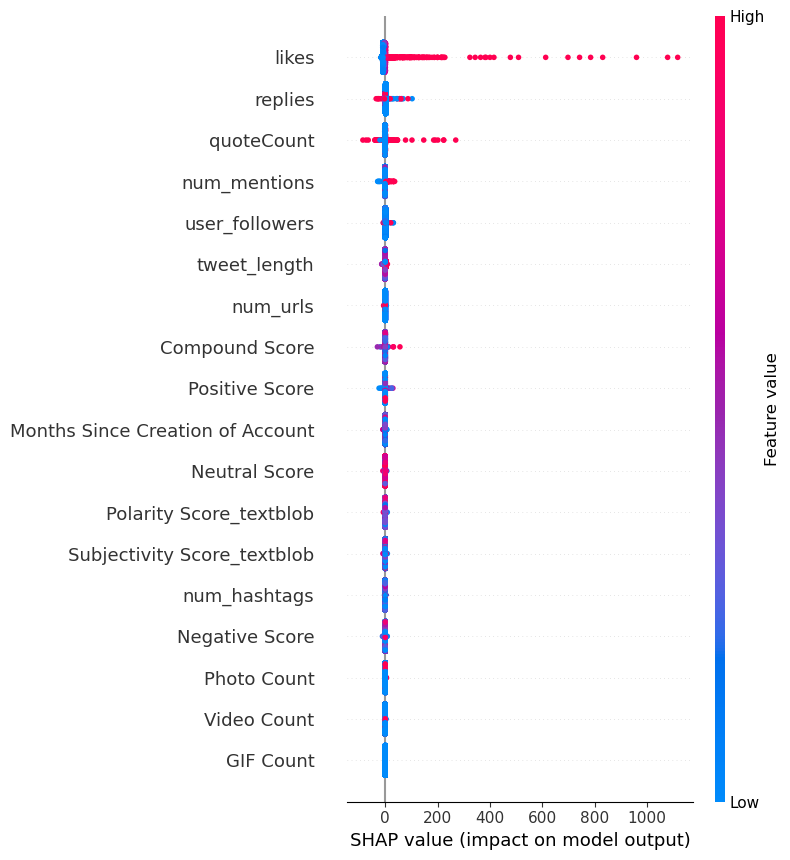

In [53]:
# Calculate the SHAP values for the classifier
explainer_clf = shap.TreeExplainer(clf)
shap_values_clf_test = explainer_clf.shap_values(X_test)

# Calculate the SHAP values for the regressor
explainer_reg = shap.TreeExplainer(reg)
shap_values_reg_test = explainer_reg.shap_values(X_test[X_train_pos.columns])

# Plot the summary plot for the classifier
shap.summary_plot(shap_values_clf_test[1], X_test)

# Plot the summary plot for the regressor
shap.summary_plot(shap_values_reg_test, X_test[X_train_pos.columns])

# Gradient boosting for classifiers and regressors

In [45]:
# initialize HurdleRegression model
clf_name = 'GBClassifier'
reg_name = 'GBRegressor'

model_5 = HurdleRegression(clf_name=clf_name, reg_name=reg_name)

# fit model on training data
model_5.fit(X_train, y_train)

# make predictions on test data
y_pred = model_5.predict(X_test)

# evaluate predictions using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 26.12582479737412


In [46]:
# cross-validate the model using the scorer
scores_5 = cross_val_score(model_5, X_train, y_train, cv=5, scoring=scorer)

# print the average RMSE and its standard deviation
print('Scores:', scores_5)
print("Average RMSE:", scores_5.mean())
print("Standard deviation:", scores_5.std())


Scores: [13.33407415 10.74509384 16.60368003 16.94286822  8.78210807]
Average RMSE: 13.281564861410112
Standard deviation: 3.1975973877431807


In [47]:
#Looking at the 0-1 accuracy
preds_5 = model_3.predict_expected_value(X_test)
preds_5_int = pd.Series(preds_5.round().astype(int)).to_numpy()
sum(preds_5_int == y_test.to_numpy())/len(preds_5_int)

0.5378035081655578

In [48]:
sum(np.multiply((preds_4_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.7898334045279795

In [57]:
# Separate the data into those with zero values and those without
# Separate the data into those with zero values and those without
zero_mask = (y_train == 0)
pos_mask = (y_train > 0)

# Set the target variable to binary values indicating zero or positive values
y_train_zero = zero_mask.astype(int)
y_train_pos = y_train[pos_mask]
X_train_pos = X_train[pos_mask]

# Train the decision tree classifier on the binary zero/positive values
clf = GradientBoostingClassifier(max_depth=5, random_state=42, n_estimators = 100)
clf.fit(X_train, y_train_zero)

# Train the decision tree regressor on the positive values
reg = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators = 100)
reg.fit(X_train_pos, y_train_pos)

# Calculate the SHAP values for the classifier
explainer_clf = shap.TreeExplainer(clf)
shap_values_clf_test = explainer_clf.shap_values(X_test)

# Calculate the SHAP values for the regressor
explainer_reg = shap.TreeExplainer(reg)
shap_values_reg_test = explainer_reg.shap_values(X_test[X_train_pos.columns])

# Plot the summary plot for the classifier
shap.summary_plot(shap_values_clf_test[1], X_test)

# Plot the summary plot for the regressor
shap.summary_plot(shap_values_reg_test, X_test[X_train_pos.columns])

AssertionError: Summary plots need a matrix of shap_values, not a vector.